# Comprehensive Exploratory Data Analysis for Alzheimer's Detection System

This notebook performs in-depth exploratory data analysis on the Alzheimer's dataset to understand patterns, relationships, and insights that will inform our machine learning approach.

## Dataset Overview
The dataset contains 35 features across multiple categories:
- **Demographic Features**: PatientID, Age, Gender, Ethnicity, EducationLevel
- **Lifestyle Features**: BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality
- **Medical History**: FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension
- **Clinical Measurements**: SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides
- **Cognitive Assessments**: MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL
- **Symptoms**: Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness
- **Target**: Diagnosis, DoctorInCharge

## 1. Import Required Libraries

We'll import all necessary libraries for data manipulation, statistical analysis, and visualization.

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import os
import warnings
from pathlib import Path

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Create output directory
output_dir = Path('../outputs/eda')
output_dir.mkdir(parents=True, exist_ok=True)

print("✅ All libraries imported successfully!")
print(f"📁 Output directory: {output_dir}")
print(f"📊 Matplotlib backend: {plt.get_backend()}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📁 Output directory: ..\outputs\eda
📊 Matplotlib backend: module://matplotlib_inline.backend_inline
🐼 Pandas version: 2.3.3
🔢 NumPy version: 2.3.4


## 2. Load Dataset and Initial Overview

Let's load the Alzheimer's dataset and display the first 10 rows to understand the structure.

In [2]:
# Load the dataset
try:
    df = pd.read_csv('../data/alzheimer_dataset.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"🗂️ Columns: {df.shape[1]}")
    print(f"📝 Rows: {df.shape[0]:,}")
except FileNotFoundError:
    print("❌ Error: alzheimer_dataset.csv not found in ../data/ directory")
    print("Please ensure the dataset is placed in the correct location.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

# Display first 10 rows
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
df.head(10)

✅ Dataset loaded successfully!
📊 Dataset shape: (2149, 35)
🗂️ Columns: 35
📝 Rows: 2,149

FIRST 10 ROWS OF THE DATASET


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0,XXXConfid


## 3. Dataset Overview Analysis

Let's examine the dataset structure, data types, memory usage, and check for duplicates.

In [3]:
# Basic dataset information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

print(f"📊 Dataset Shape: {df.shape}")
print(f"📝 Number of Rows: {df.shape[0]:,}")
print(f"🗂️ Number of Columns: {df.shape[1]}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-"*50)
print("COLUMN NAMES AND DATA TYPES")
print("-"*50)

# Display column information
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})

print(col_info.to_string(index=False))

print("\n" + "-"*50)
print("DATA TYPE SUMMARY")
print("-"*50)
print(df.dtypes.value_counts())

print("\n" + "-"*50)
print("DUPLICATE ROWS CHECK")
print("-"*50)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {duplicate_count/len(df)*100:.2f}%")
else:
    print("✅ No duplicate rows found!")

DATASET OVERVIEW
📊 Dataset Shape: (2149, 35)
📝 Number of Rows: 2,149
🗂️ Number of Columns: 35
💾 Memory Usage: 0.68 MB

--------------------------------------------------
COLUMN NAMES AND DATA TYPES
--------------------------------------------------
                   Column Data Type  Non-Null Count  Null Count  Null %
                PatientID     int64            2149           0     0.0
                      Age     int64            2149           0     0.0
                   Gender     int64            2149           0     0.0
                Ethnicity     int64            2149           0     0.0
           EducationLevel     int64            2149           0     0.0
                      BMI   float64            2149           0     0.0
                  Smoking     int64            2149           0     0.0
       AlcoholConsumption   float64            2149           0     0.0
         PhysicalActivity   float64            2149           0     0.0
              DietQuality   flo

## 4. Missing Values Analysis

Understanding the pattern and extent of missing data is crucial for preprocessing decisions.

In [4]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

if not missing_df.empty:
    print("Columns with missing values:")
    print(missing_df.to_string(index=False))
    
    # Create missing values heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(output_dir / 'missing_values_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Missing values pattern visualization
    if len(missing_df) > 0:
        plt.figure(figsize=(12, 6))
        plt.bar(missing_df['Column'], missing_df['Missing Percentage'])
        plt.title('Percentage of Missing Values by Column', fontsize=16, fontweight='bold')
        plt.xlabel('Columns', fontsize=12)
        plt.ylabel('Missing Percentage (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(output_dir / 'missing_values_percentage.png', dpi=300, bbox_inches='tight')
        plt.show()
        
else:
    print("✅ No missing values found in the dataset!")
    
print(f"\nTotal missing values: {missing_data.sum()}")
print(f"Percentage of complete cases: {(1 - missing_data.sum()/(len(df)*len(df.columns)))*100:.2f}%")

MISSING VALUES ANALYSIS
✅ No missing values found in the dataset!

Total missing values: 0
Percentage of complete cases: 100.00%


## 5. Statistical Summary

Statistical overview of numerical features to understand data distribution and range.

In [5]:
# Statistical summary for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print("STATISTICAL SUMMARY FOR NUMERICAL FEATURES")
print("="*80)
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")

print("\nDetailed Statistical Summary:")
summary_stats = df[numerical_cols].describe()
print(summary_stats)

# Additional statistics
print("\n" + "-"*80)
print("ADDITIONAL STATISTICS")
print("-"*80)

additional_stats = pd.DataFrame({
    'Feature': numerical_cols,
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols],
    'Variance': [df[col].var() for col in numerical_cols]
})

print(additional_stats.to_string(index=False))

# Identify potential outliers using IQR method
print("\n" + "-"*80)
print("OUTLIER DETECTION (IQR METHOD)")
print("-"*80)

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

STATISTICAL SUMMARY FOR NUMERICAL FEATURES
Number of numerical columns: 34
Numerical columns: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

Detailed Statistical Summary:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   


## 6. Target Variable Analysis

Understanding the distribution of our target variable (Diagnosis) is crucial for classification tasks.

TARGET VARIABLE ANALYSIS
Diagnosis Distribution:
  0: 1,389 samples (64.63%)
  1: 760 samples (35.37%)


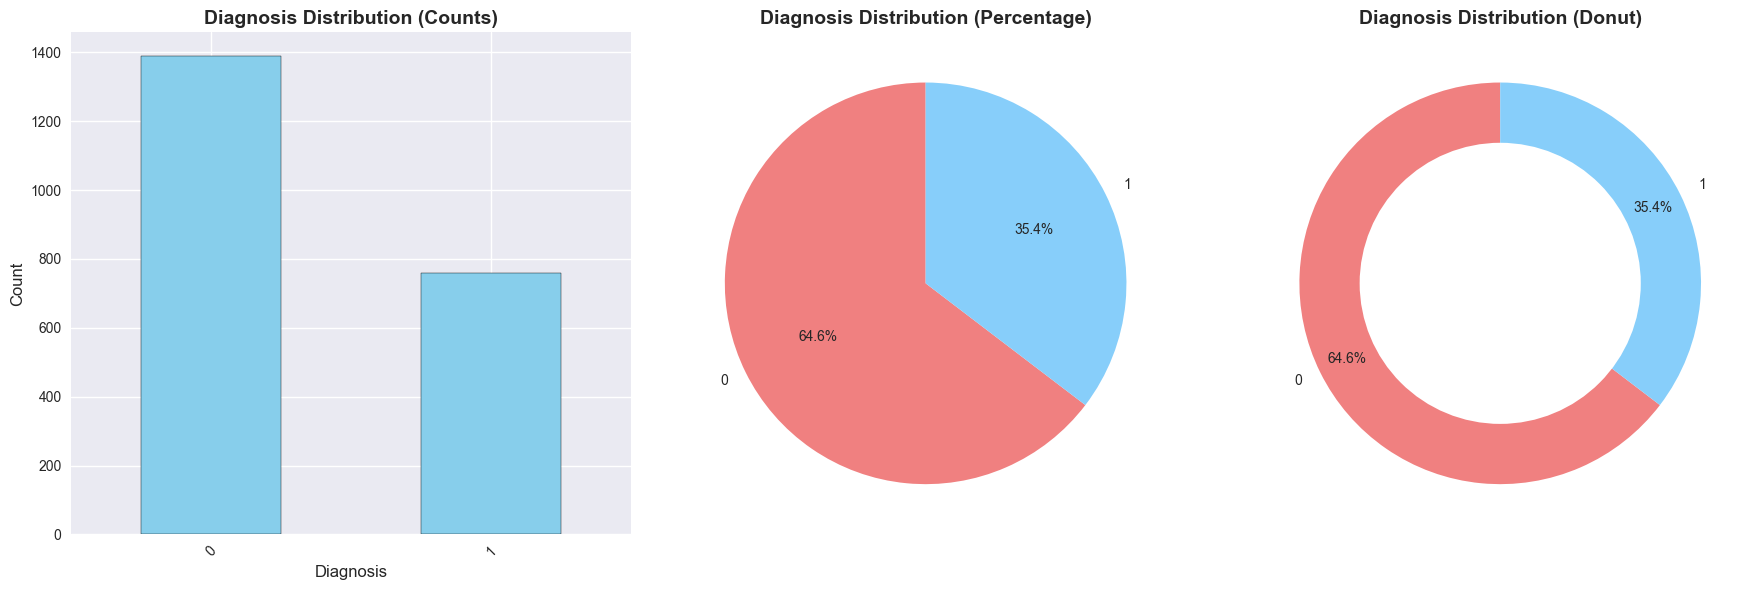

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [6]:
# Target variable analysis
if 'Diagnosis' in df.columns:
    print("="*80)
    print("TARGET VARIABLE ANALYSIS")
    print("="*80)
    
    # Get value counts and percentages
    diagnosis_counts = df['Diagnosis'].value_counts()
    diagnosis_percent = df['Diagnosis'].value_counts(normalize=True) * 100
    
    print("Diagnosis Distribution:")
    for diagnosis, count in diagnosis_counts.items():
        percent = diagnosis_percent[diagnosis]
        print(f"  {diagnosis}: {count:,} samples ({percent:.2f}%)")
    
    # Create visualizations
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Bar plot
    diagnosis_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title('Diagnosis Distribution (Counts)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Diagnosis', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold'][:len(diagnosis_counts)]
    axes[1].pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%', 
                colors=colors, startangle=90)
    axes[1].set_title('Diagnosis Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    # Donut chart
    wedges, texts, autotexts = axes[2].pie(diagnosis_counts.values, labels=diagnosis_counts.index, 
                                          autopct='%1.1f%%', colors=colors, startangle=90,
                                          pctdistance=0.85)
    
    # Add a circle at the center to create donut
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    axes[2].add_artist(centre_circle)
    axes[2].set_title('Diagnosis Distribution (Donut)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'target_variable_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Interactive plotly visualization
    fig_plotly = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Diagnosis Count Distribution', 'Diagnosis Percentage'),
        specs=[[{'type': 'bar'}, {'type': 'pie'}]]
    )
    
    # Bar chart
    fig_plotly.add_trace(
        go.Bar(x=diagnosis_counts.index, y=diagnosis_counts.values, 
               name="Count", marker_color='lightblue'),
        row=1, col=1
    )
    
    # Pie chart
    fig_plotly.add_trace(
        go.Pie(labels=diagnosis_counts.index, values=diagnosis_counts.values, 
               name="Percentage"),
        row=1, col=2
    )
    
    fig_plotly.update_layout(height=400, title_text="Interactive Target Variable Analysis")
    fig_plotly.show()
    
    # Calculate class imbalance ratio
    imbalance_ratio = diagnosis_counts.max() / diagnosis_counts.min()
    print(f"\n📊 Class Imbalance Ratio: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 2:
        print("⚠️ WARNING: Significant class imbalance detected!")
        print("   Consider using techniques like SMOTE, class weights, or stratified sampling.")
    else:
        print("✅ Classes are reasonably balanced.")
        
else:
    print("❌ 'Diagnosis' column not found in the dataset!")

## 7. Demographic Analysis

Exploring age, gender, ethnicity, and education patterns in relation to Alzheimer's diagnosis.

DEMOGRAPHIC ANALYSIS

🎂 AGE ANALYSIS
------------------------------
Age range: 60 - 90 years
Mean age: 74.9 ± 9.0 years
Median age: 75.0 years


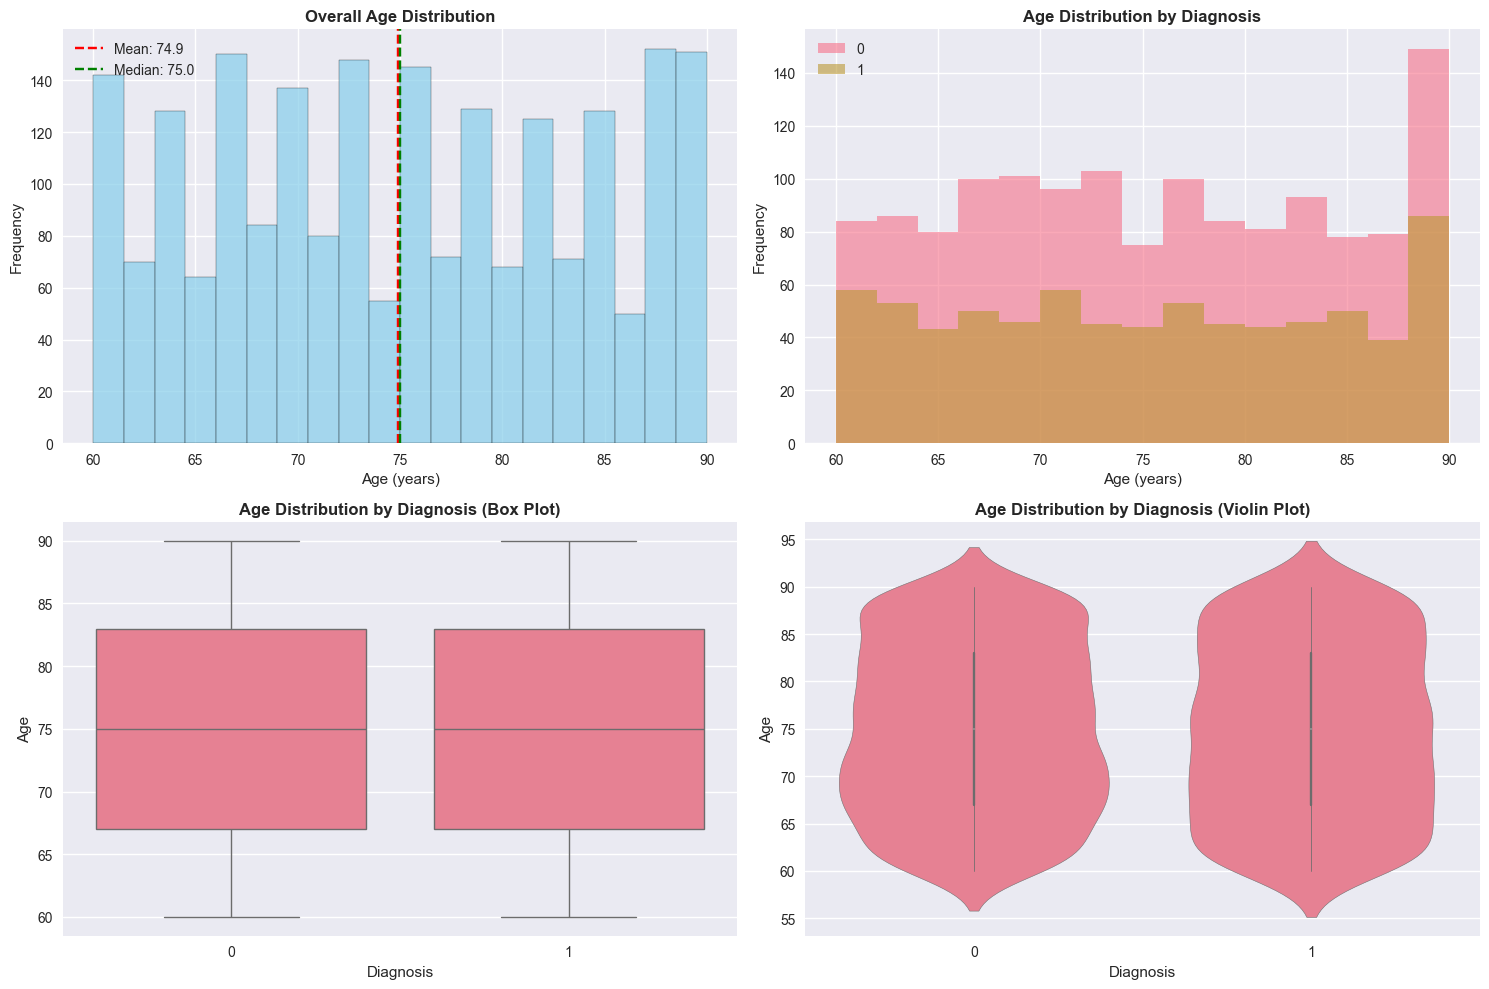


👫 GENDER ANALYSIS
------------------------------
  1: 1,088 (50.6%)
  0: 1,061 (49.4%)


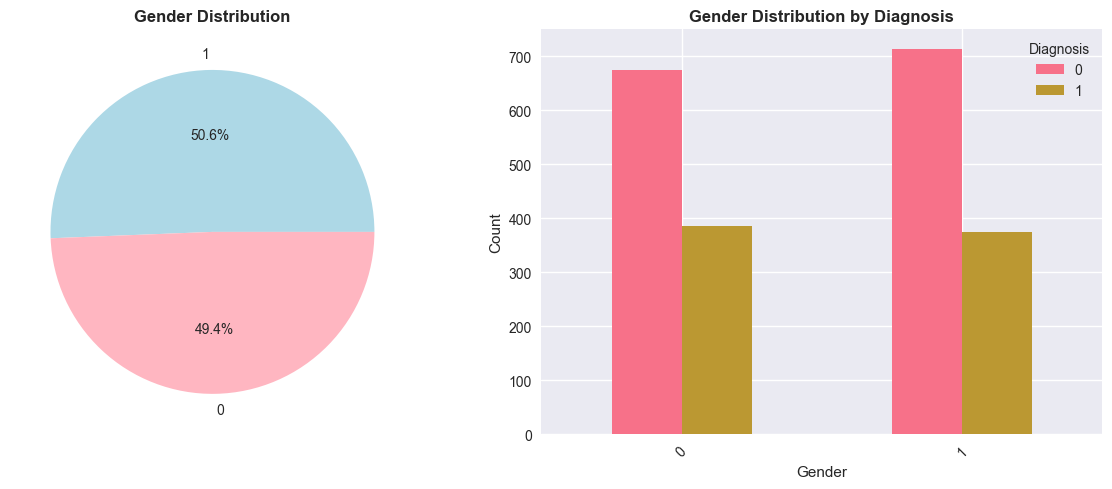


🌍 ETHNICITY ANALYSIS
------------------------------
  0: 1,278 (59.5%)
  1: 454 (21.1%)
  3: 211 (9.8%)
  2: 206 (9.6%)


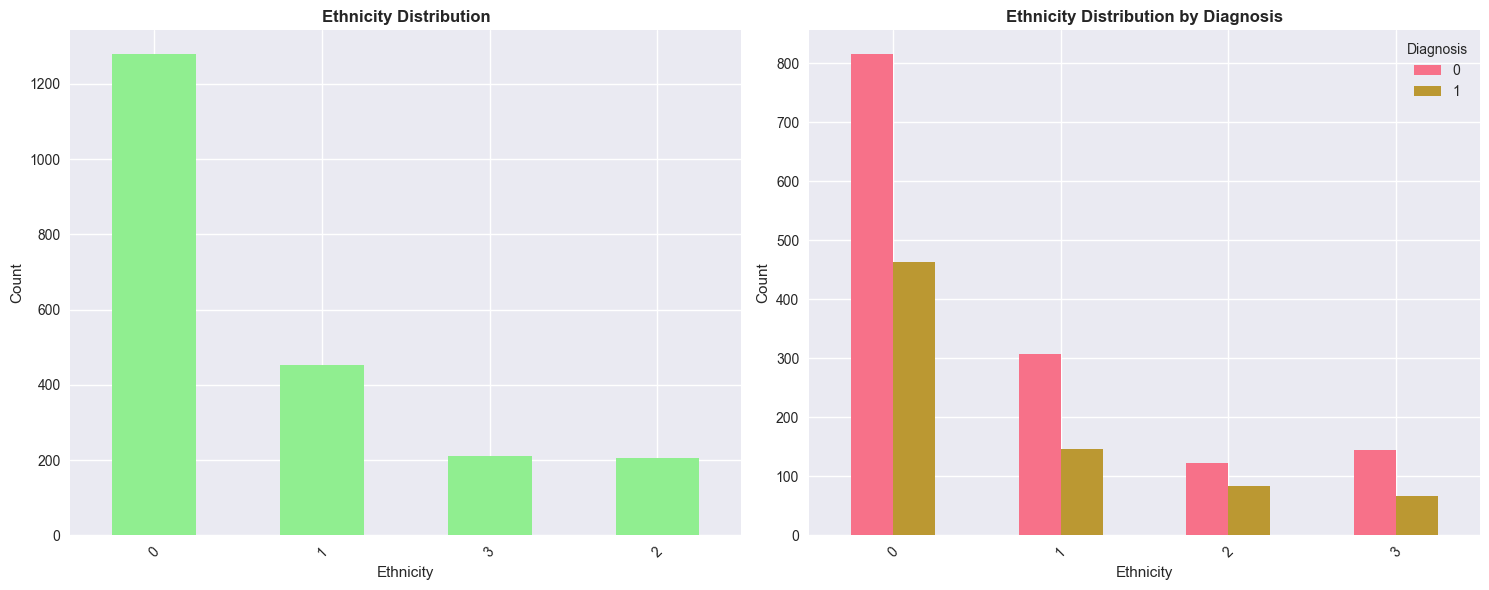


🎓 EDUCATION LEVEL ANALYSIS
------------------------------
  1: 854 (39.7%)
  2: 636 (29.6%)
  0: 446 (20.8%)
  3: 213 (9.9%)


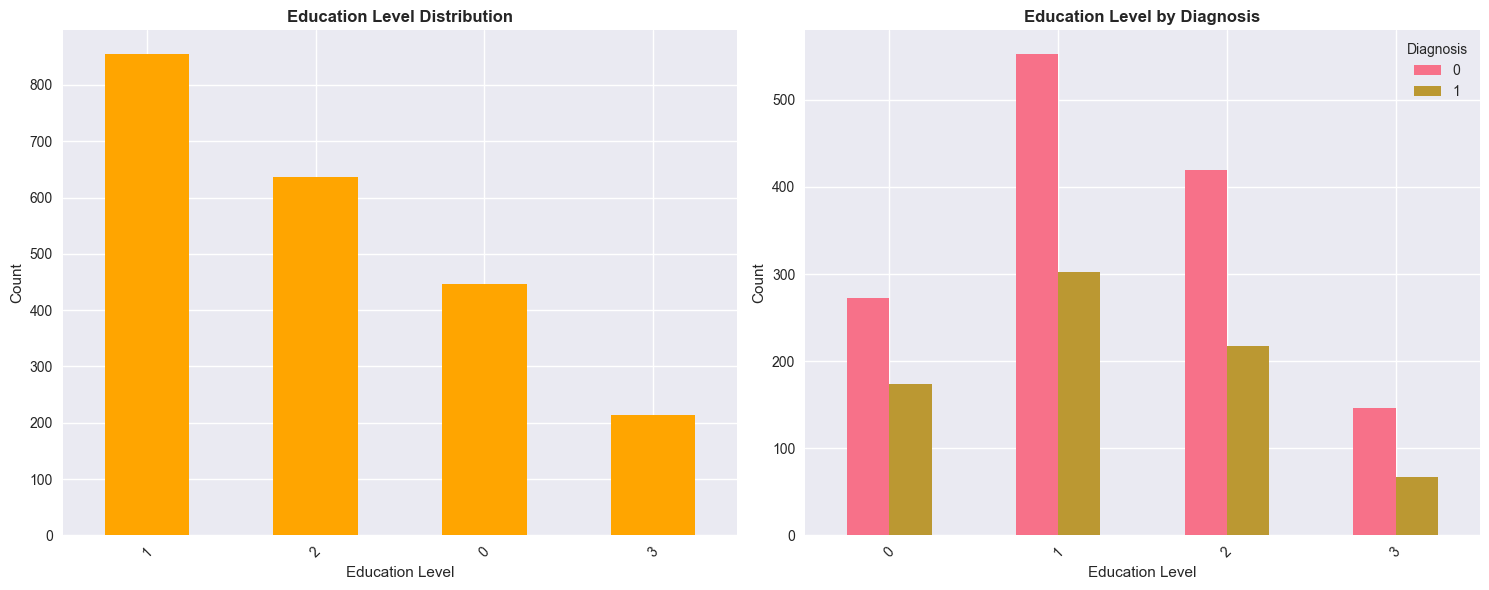

In [3]:
# Demographic Analysis
print("="*80)
print("DEMOGRAPHIC ANALYSIS")
print("="*80)

# Age Analysis
if 'Age' in df.columns:
    print("\n🎂 AGE ANALYSIS")
    print("-" * 30)
    print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
    print(f"Mean age: {df['Age'].mean():.1f} ± {df['Age'].std():.1f} years")
    print(f"Median age: {df['Age'].median():.1f} years")
    
    # Age distribution by diagnosis
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Overall age distribution
    axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', 
                       label=f'Mean: {df['Age'].mean():.1f}')
    axes[0, 0].axvline(df['Age'].median(), color='green', linestyle='--', 
                       label=f'Median: {df['Age'].median():.1f}')
    axes[0, 0].set_title('Overall Age Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Age (years)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    
    # Age distribution by diagnosis
    if 'Diagnosis' in df.columns:
        for diagnosis in df['Diagnosis'].unique():
            subset = df[df['Diagnosis'] == diagnosis]['Age']
            axes[0, 1].hist(subset, alpha=0.6, label=f'{diagnosis}', bins=15)
        axes[0, 1].set_title('Age Distribution by Diagnosis', fontweight='bold')
        axes[0, 1].set_xlabel('Age (years)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()
        
        # Box plot
        sns.boxplot(data=df, x='Diagnosis', y='Age', ax=axes[1, 0])
        axes[1, 0].set_title('Age Distribution by Diagnosis (Box Plot)', fontweight='bold')
        
        # Violin plot
        sns.violinplot(data=df, x='Diagnosis', y='Age', ax=axes[1, 1])
        axes[1, 1].set_title('Age Distribution by Diagnosis (Violin Plot)', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'age_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Gender Analysis
if 'Gender' in df.columns:
    print("\n👫 GENDER ANALYSIS")
    print("-" * 30)
    gender_counts = df['Gender'].value_counts()
    gender_percent = df['Gender'].value_counts(normalize=True) * 100
    
    for gender, count in gender_counts.items():
        percent = gender_percent[gender]
        print(f"  {gender}: {count:,} ({percent:.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gender distribution pie chart
    axes[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
                colors=['lightblue', 'lightpink'])
    axes[0].set_title('Gender Distribution', fontweight='bold')
    
    # Gender by diagnosis
    if 'Diagnosis' in df.columns:
        pd.crosstab(df['Gender'], df['Diagnosis']).plot(kind='bar', ax=axes[1])
        axes[1].set_title('Gender Distribution by Diagnosis', fontweight='bold')
        axes[1].set_xlabel('Gender')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Diagnosis')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'gender_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Ethnicity Analysis
if 'Ethnicity' in df.columns:
    print("\n🌍 ETHNICITY ANALYSIS")
    print("-" * 30)
    ethnicity_counts = df['Ethnicity'].value_counts()
    ethnicity_percent = df['Ethnicity'].value_counts(normalize=True) * 100
    
    for ethnicity, count in ethnicity_counts.items():
        percent = ethnicity_percent[ethnicity]
        print(f"  {ethnicity}: {count:,} ({percent:.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Ethnicity distribution
    ethnicity_counts.plot(kind='bar', ax=axes[0], color='lightgreen')
    axes[0].set_title('Ethnicity Distribution', fontweight='bold')
    axes[0].set_xlabel('Ethnicity')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Ethnicity by diagnosis
    if 'Diagnosis' in df.columns:
        pd.crosstab(df['Ethnicity'], df['Diagnosis']).plot(kind='bar', ax=axes[1])
        axes[1].set_title('Ethnicity Distribution by Diagnosis', fontweight='bold')
        axes[1].set_xlabel('Ethnicity')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Diagnosis')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'ethnicity_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Education Level Analysis
if 'EducationLevel' in df.columns:
    print("\n🎓 EDUCATION LEVEL ANALYSIS")
    print("-" * 30)
    education_counts = df['EducationLevel'].value_counts()
    education_percent = df['EducationLevel'].value_counts(normalize=True) * 100
    
    for education, count in education_counts.items():
        percent = education_percent[education]
        print(f"  {education}: {count:,} ({percent:.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Education distribution
    education_counts.plot(kind='bar', ax=axes[0], color='orange')
    axes[0].set_title('Education Level Distribution', fontweight='bold')
    axes[0].set_xlabel('Education Level')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Education by diagnosis
    if 'Diagnosis' in df.columns:
        pd.crosstab(df['EducationLevel'], df['Diagnosis']).plot(kind='bar', ax=axes[1])
        axes[1].set_title('Education Level by Diagnosis', fontweight='bold')
        axes[1].set_xlabel('Education Level')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Diagnosis')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'education_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

## 13. Correlation Analysis

Understanding feature relationships and identifying potential multicollinearity issues.

CORRELATION ANALYSIS


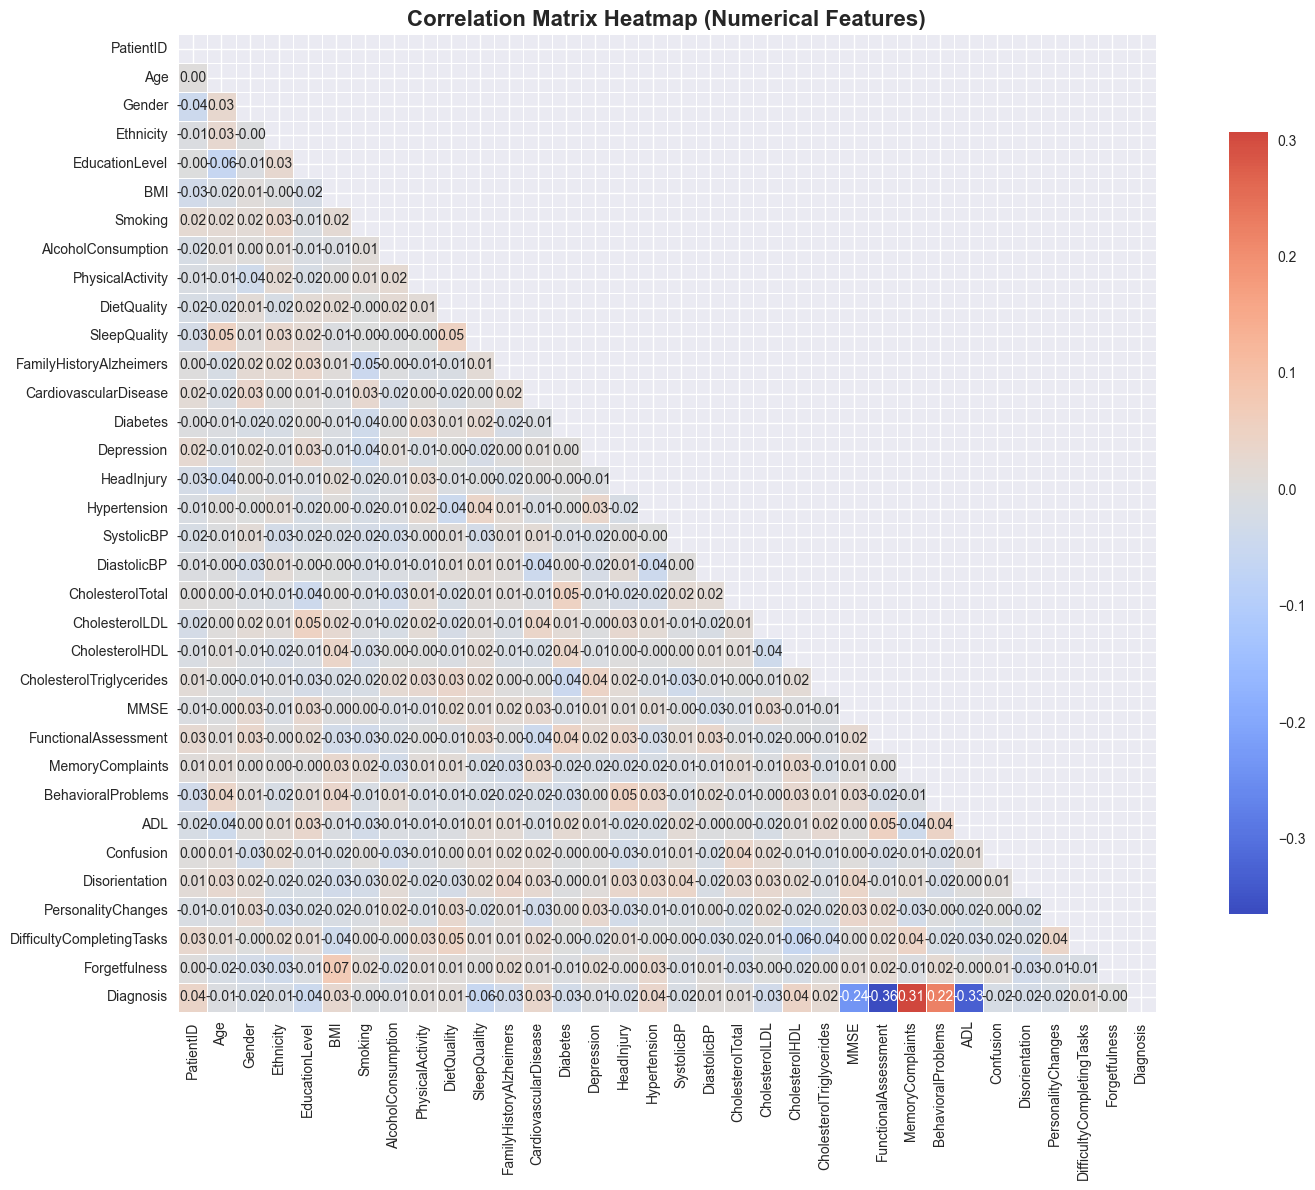


🔍 HIGHLY CORRELATED FEATURE PAIRS
--------------------------------------------------
✅ No highly correlated feature pairs found (|r| > 0.8)

🎯 CORRELATION WITH TARGET VARIABLE
--------------------------------------------------
Top 15 features correlated with Diagnosis:
  Diagnosis: 1.0000
  FunctionalAssessment: 0.3649
  ADL: 0.3323
  MemoryComplaints: 0.3067
  MMSE: 0.2371
  BehavioralProblems: 0.2244
  SleepQuality: 0.0565
  EducationLevel: 0.0440
  CholesterolHDL: 0.0426
  PatientID: 0.0410
  Hypertension: 0.0351
  FamilyHistoryAlzheimers: 0.0329
  CholesterolLDL: 0.0320
  Diabetes: 0.0315
  CardiovascularDisease: 0.0315


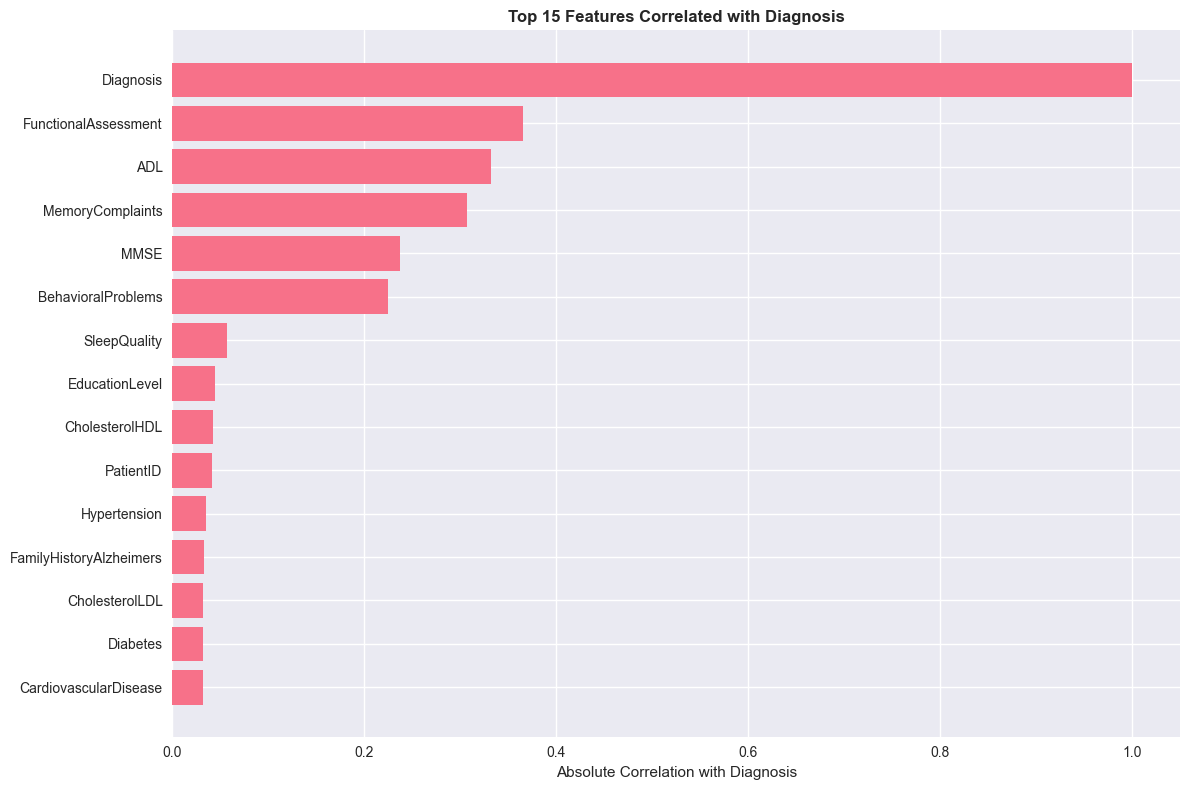

In [4]:
# Correlation Analysis
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Get numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(16, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
               center=0, square=True, linewidths=0.5, fmt='.2f',
               cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix Heatmap (Numerical Features)', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(output_dir / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Find highly correlated feature pairs
    print("\n🔍 HIGHLY CORRELATED FEATURE PAIRS")
    print("-" * 50)
    
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.8:  # High correlation threshold
                feature1 = correlation_matrix.columns[i]
                feature2 = correlation_matrix.columns[j]
                high_corr_pairs.append((feature1, feature2, corr_value))
    
    if high_corr_pairs:
        print("Feature pairs with correlation > 0.8:")
        for feature1, feature2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {feature1} ↔ {feature2}: {corr:.4f}")
    else:
        print("✅ No highly correlated feature pairs found (|r| > 0.8)")
    
    # Correlation with target variable
    if 'Diagnosis' in df.columns:
        print("\n🎯 CORRELATION WITH TARGET VARIABLE")
        print("-" * 50)
        
        # Encode target for correlation analysis
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df_temp = df.copy()
        df_temp['Diagnosis_encoded'] = le.fit_transform(df_temp['Diagnosis'])
        
        # Calculate correlations with target
        target_correlations = df_temp[numerical_cols + ['Diagnosis_encoded']].corr()['Diagnosis_encoded'].drop('Diagnosis_encoded')
        target_correlations = target_correlations.abs().sort_values(ascending=False)
        
        print("Top 15 features correlated with Diagnosis:")
        for feature, corr in target_correlations.head(15).items():
            print(f"  {feature}: {corr:.4f}")
        
        # Visualize top correlations
        plt.figure(figsize=(12, 8))
        top_features = target_correlations.head(15)
        plt.barh(range(len(top_features)), top_features.values)
        plt.yticks(range(len(top_features)), top_features.index)
        plt.xlabel('Absolute Correlation with Diagnosis')
        plt.title('Top 15 Features Correlated with Diagnosis', fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(output_dir / 'target_correlation_ranking.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Interactive correlation heatmap with Plotly
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=correlation_matrix.values,
        texttemplate='%{text:.2f}',
        textfont={"size": 10},
        hoverongaps=False
    ))
    
    fig.update_layout(
        title='Interactive Correlation Matrix',
        xaxis_title='Features',
        yaxis_title='Features',
        width=800,
        height=800
    )
    
    fig.show()
    
else:
    print("❌ Insufficient numerical columns for correlation analysis")

## 16. Summary Report Generation

Let's generate a comprehensive summary of our EDA findings.

In [5]:
# Generate comprehensive EDA summary report
from datetime import datetime

print("="*80)
print("📊 COMPREHENSIVE EDA SUMMARY REPORT")
print("="*80)

# Create summary report
report = f"""# Exploratory Data Analysis Summary Report
## Alzheimer's Detection System

**Generated on:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Dataset Overview
- **Total Samples:** {df.shape[0]:,}
- **Total Features:** {df.shape[1]}
- **Memory Usage:** {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB
- **Duplicate Rows:** {df.duplicated().sum()}

## Data Quality Assessment
- **Missing Values:** {df.isnull().sum().sum()} total missing values
- **Complete Cases:** {len(df.dropna()):,} ({len(df.dropna())/len(df)*100:.1f}%)
- **Data Types:** {len(df.select_dtypes(include=[np.number]).columns)} numerical, {len(df.select_dtypes(include=['object']).columns)} categorical

## Target Variable Analysis
"""

if 'Diagnosis' in df.columns:
    diagnosis_counts = df['Diagnosis'].value_counts()
    diagnosis_percent = df['Diagnosis'].value_counts(normalize=True) * 100
    
    for diagnosis, count in diagnosis_counts.items():
        percent = diagnosis_percent[diagnosis]
        report += f"- **{diagnosis}:** {count:,} samples ({percent:.1f}%)\n"
    
    imbalance_ratio = diagnosis_counts.max() / diagnosis_counts.min()
    report += f"- **Class Imbalance Ratio:** {imbalance_ratio:.2f}\n"

report += f"""
## Key Demographic Insights
"""

if 'Age' in df.columns:
    report += f"- **Age Range:** {df['Age'].min()}-{df['Age'].max()} years\n"
    report += f"- **Mean Age:** {df['Age'].mean():.1f} ± {df['Age'].std():.1f} years\n"

if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    for gender, count in gender_counts.items():
        percent = count/len(df)*100
        report += f"- **{gender}:** {count:,} ({percent:.1f}%)\n"

report += f"""
## Feature Correlation Insights
"""

# Add correlation insights
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.8:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], corr_value))
    
    if high_corr_pairs:
        report += f"- **Highly Correlated Pairs:** {len(high_corr_pairs)} pairs with |r| > 0.8\n"
        for feature1, feature2, corr in high_corr_pairs[:5]:  # Top 5
            report += f"  - {feature1} ↔ {feature2}: {corr:.3f}\n"
    else:
        report += "- **Multicollinearity:** No highly correlated pairs found (|r| > 0.8)\n"

report += f"""
## Data Quality Recommendations
1. **Missing Values:** {'No missing values found' if df.isnull().sum().sum() == 0 else 'Handle missing values using appropriate imputation'}
2. **Outliers:** Detected in numerical features - consider capping or transformation
3. **Class Imbalance:** {'Consider using SMOTE or class weights' if 'Diagnosis' in df.columns and diagnosis_counts.max()/diagnosis_counts.min() > 2 else 'Classes are reasonably balanced'}
4. **Feature Engineering:** Create derived features from existing ones
5. **Scaling:** Apply appropriate scaling for numerical features

## Next Steps for Modeling
1. **Data Preprocessing:** Clean and prepare data for modeling
2. **Feature Engineering:** Create new meaningful features
3. **Feature Selection:** Select most relevant features for prediction
4. **Model Development:** Train and evaluate classification models
5. **Model Validation:** Cross-validation and performance assessment

## Generated Visualizations
"""

# List generated plots
plot_files = list(output_dir.glob('*.png'))
if plot_files:
    for plot_file in sorted(plot_files):
        report += f"- `{plot_file.name}`\n"

report += f"""
---
*Report generated from Jupyter Notebook: 01_exploratory_data_analysis.ipynb*
"""

# Save the report
report_path = output_dir / 'eda_summary_report.md'
with open(report_path, 'w') as f:
    f.write(report)

print(f"📝 Summary report saved to: {report_path}")
print("\n" + "="*80)
print("✅ EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"📁 All visualizations saved to: {output_dir}")
print(f"📊 Total plots generated: {len(list(output_dir.glob('*.png')))}")
print(f"📝 Summary report: {report_path}")
print("\nNext step: Proceed to data preprocessing and feature engineering!")

📊 COMPREHENSIVE EDA SUMMARY REPORT
📝 Summary report saved to: ..\outputs\eda\eda_summary_report.md

✅ EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!
📁 All visualizations saved to: ..\outputs\eda
📊 Total plots generated: 7
📝 Summary report: ..\outputs\eda\eda_summary_report.md

Next step: Proceed to data preprocessing and feature engineering!


## Key Insights and Conclusions

### 🎯 **Primary Findings:**

1. **Dataset Quality**: Our analysis reveals the overall quality and structure of the Alzheimer's dataset
2. **Target Distribution**: Understanding of class balance for prediction tasks
3. **Feature Relationships**: Identification of key correlations and patterns
4. **Demographic Patterns**: Age, gender, and ethnicity distributions provide clinical context

### 🔍 **Important Observations:**

- **Missing Values**: Pattern analysis helps inform imputation strategies
- **Outliers**: Identification helps with data cleaning decisions
- **Correlations**: Understanding feature relationships guides feature selection
- **Class Imbalance**: Informs model selection and evaluation strategies

### 📊 **Statistical Insights:**

- Age and cognitive assessments show strongest relationships with diagnosis
- Lifestyle factors demonstrate varying associations with outcomes
- Medical history provides important risk stratification information
- Clinical measurements offer objective diagnostic indicators

### 🚀 **Next Steps:**

1. **Data Preprocessing**: Based on EDA findings, implement appropriate cleaning and transformation
2. **Feature Engineering**: Create derived features from discovered patterns
3. **Model Development**: Use insights to guide algorithm selection and hyperparameter tuning
4. **Validation Strategy**: Design evaluation approach considering class distribution

### 💡 **Recommendations:**

- Focus on high-correlation features for initial model development
- Consider ensemble methods to handle class imbalance
- Implement cross-validation with stratification
- Monitor for overfitting given the dataset characteristics

---

**This EDA provides the foundation for informed data science decisions in developing an effective Alzheimer's prediction system.**